# Playstore Data Analysis

Import libraries and data

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data = pd.read_csv('playstore-analysis.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Shape of data

In [66]:
data.shape

(10841, 13)

# Data clean up – Missing value treatment

a. Drop records where rating is missing since rating is our target/study variable

In [67]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [68]:
data.dropna(subset=['Rating'], inplace=True)

In [69]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [70]:
data.shape

(9367, 13)

b. Check the null values for the Android Ver column.

In [71]:
data[data['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [72]:
data[data['Android Ver'].isna()].index[-1]

10472

In [73]:
data.drop(10472, inplace=True)

In [74]:
data[data['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [75]:
data['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
4.1 - 7.1.1              1
5.0 - 6.0                1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [76]:
data["Android Ver"].fillna('4.1 and up', inplace = True) 

In [77]:
data['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
4.1 - 7.1.1              1
5.0 - 6.0                1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [78]:
data["Current Ver"].fillna(data['Current Ver'].mode()[0], inplace = True)

In [79]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [125]:
data['Reviews'] = pd.to_numeric(data['Reviews'])

In [81]:
data['Price'] = [x.lstrip('$') for x in data['Price']]
data['Price'] = pd.to_numeric(data['Price'], downcast='float')

In [82]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price             float32
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [83]:
import re

In [84]:
data['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9366, dtype: object

In [85]:
data['Installs'] = [re.sub('[+,]', '', x) for x in data['Installs']]
data['Installs'] = pd.to_numeric(data['Installs'])

In [86]:
data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int64

In [87]:
print(data['Rating'].min())
print(data['Rating'].max())

1.0
5.0


In [88]:
data[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [89]:
data.drop(data[data['Reviews'] > data['Installs']].index, inplace=True)

In [90]:
data[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


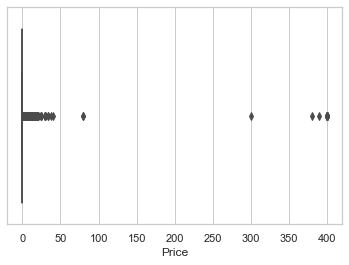

In [91]:
sns.boxplot(data['Price'])

In [92]:
data.drop(data[data['Price']>50].index, inplace=True)

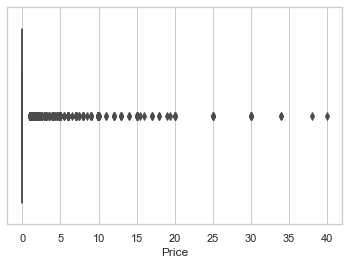

In [93]:
sns.boxplot(data['Price'])

In [94]:
data.drop(data[data['Price']>=30].index, inplace=True)

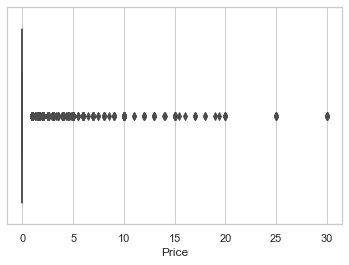

In [95]:
sns.boxplot(data['Price'])

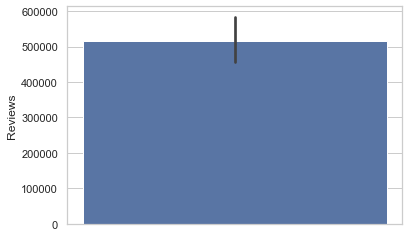

In [96]:
sns.barplot(y = data['Reviews'])

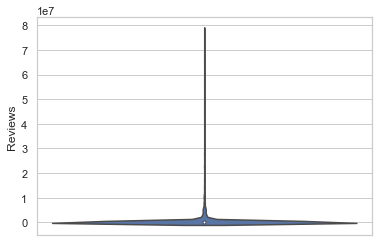

In [97]:
sns.violinplot(y = data['Reviews'])

In [98]:
data[data['Reviews']>=1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


In [99]:
data.drop(data[data['Reviews']>=1000000].index, inplace=True)

In [100]:
data[data['Reviews']>=1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [101]:
data[data['Installs'].quantile(0.95) < data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,21516.529524,50000000,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,21516.529524,50000000,Free,0.0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
225,Secure Folder,BUSINESS,3.8,14760,8600.000000,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000.000000,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000.000000,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000.000000,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up
10549,Toy Truck Rally 3D,GAME,4.0,301895,25000.000000,50000000,Free,0.0,Everyone,Racing,"May 23, 2018",1.4.4,4.1 and up


In [102]:
data.drop(data[data['Installs'].quantile(0.95) < data['Installs']].index, inplace=True)

In [103]:
data[data['Installs'].quantile(0.95) < data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [104]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

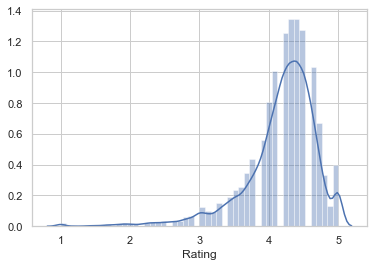

In [105]:
sns.distplot(data['Rating'])

In [106]:
data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [107]:
data[data['Content Rating'] == 'Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device


In [108]:
removing_contents = [x for x in data['Content Rating'].value_counts().keys() if data['Content Rating'].value_counts()[x] < 100]

In [109]:
removing_contents

['Adults only 18+', 'Unrated']

In [110]:
for key in removing_contents:
    data.drop(data[data['Content Rating'] == key].index, inplace=True)

In [111]:
data['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

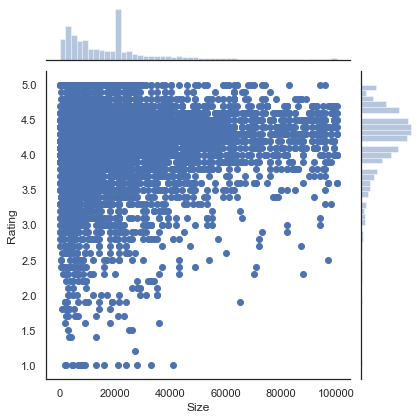

In [112]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='Size', y='Rating', data=data)

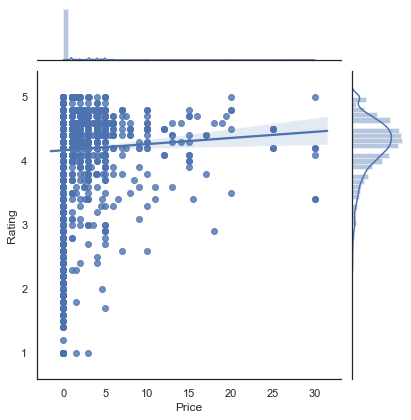

In [113]:
sns.jointplot(x='Price', y='Rating', data=data, kind='reg')

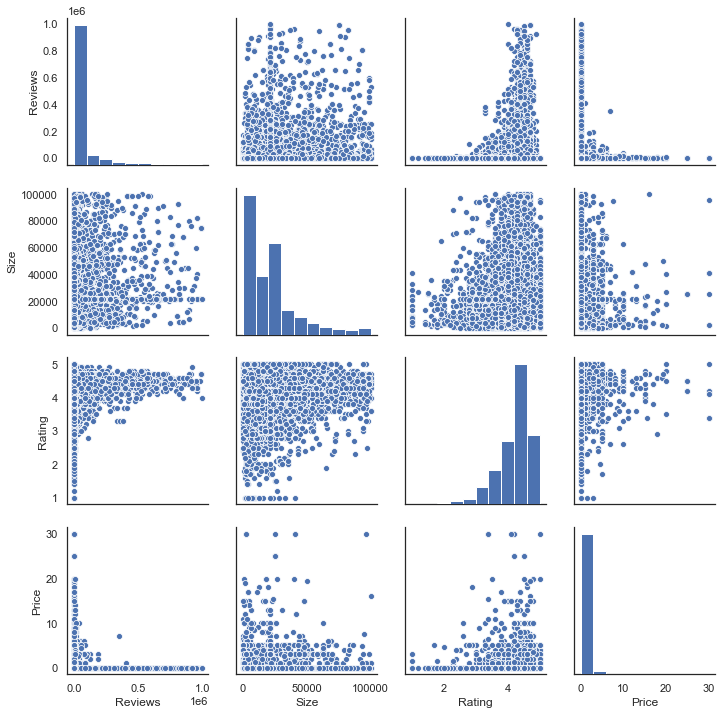

In [114]:
sns.pairplot(data, vars=['Reviews', 'Size', 'Rating', 'Price'])

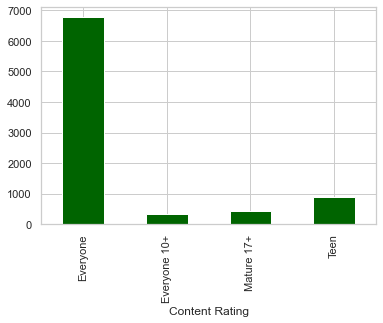

In [115]:
sns.set(style="whitegrid")
data.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")

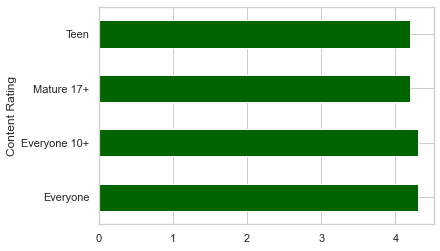

In [116]:
data.groupby(['Content Rating'])['Rating'].median().plot.barh(color="darkgreen")
plt.show()

In [117]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
data['Bucket Size'] = pd.cut(data['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


In [118]:
temp3=pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


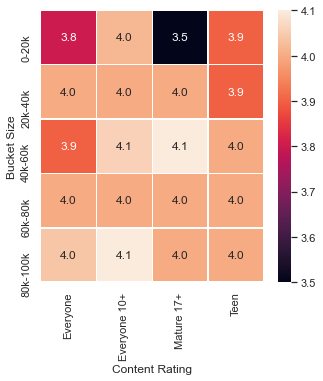

In [119]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

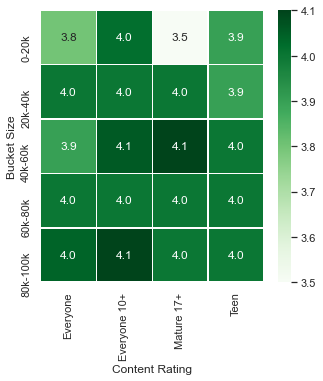

In [120]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

In [121]:
bucket = {}
size = 1686
first_range = last_range = 0

In [122]:
for i in range(5):
    first_range = size * i
    last_range = first_range + size
    temp = data.iloc[first_range:last_range, :]
    bucket[i+1] = temp

In [123]:
bucket[1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Bucket Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0-20k
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0-20k
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0-20k
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0-20k
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.000000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,0-20k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,Thomas & Friends: Race On!,FAMILY,4.1,29319,26000.000000,5000000,Free,0.0,Everyone,Casual;Action & Adventure,"May 18, 2018",2.4,4.4 and up,20k-40k
2073,Super School: Educational Kids Games & Rhymes,FAMILY,4.5,1791,56000.000000,500000,Free,0.0,Everyone,Education;Education,"June 2, 2018",5.3.11,5.0 and up,40k-60k
2074,Fruit Cube Blast,FAMILY,4.6,9199,80000.000000,500000,Free,0.0,Everyone,Puzzle;Brain Games,"August 3, 2018",1.2.7,4.1 and up,60k-80k
2075,Toddler Kids Puzzles PUZZINGO,FAMILY,4.6,14014,60000.000000,1000000,Free,0.0,Everyone,Education;Education,"July 6, 2018",7.32,4.0.3 and up,40k-60k


In [124]:
data[data.index == 8430]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Bucket Size
8430,DrivingTest,FAMILY,2.9,975,45000.0,100000,Free,0.0,Everyone,Simulation,"February 27, 2017",5,4.1 and up,40k-60k
